# Libraries and setup variables

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from utils import summarise_column

### Loading the processed dataset

Here we'll load the data into a dataframe, and run a series of initial exploratory analysis.

In [3]:
df = pd.read_csv('../data/interim/census_income_learn.csv')

By using a sample of 250 rows we can quicly inspect which rows might be missing some values.<br>
In the original dataset, the term 'Not in universe' seems to be used in place of a missing value.<br>

From this small sample, we can already see that certain variables are not as complete as others. For example 'class of worker' or 'major occupation code', among others appear incomplete

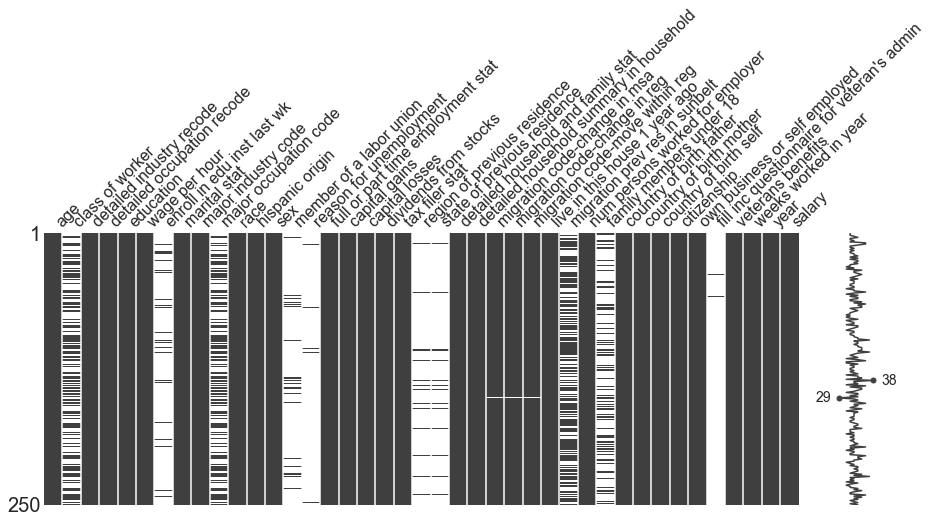

In [3]:
df_na = df.replace(" Not in universe", np.nan)
msno.matrix(df_na.sample(250),figsize=(15,5))

# Columns exploration

The columns in this dataset are of two types:

- Continuous (7 columns)
- Nominal (33 columns)

For the continuous columns we can build histograms and understand the data in this way. In addition we can also consider filling the missing values if this is a possibility


### 1) Age

A summary for the age column shows that over 75% of the population is 50 years old or younger.

Summary for column: age
                 age
count  199523.000000
mean       34.494199
std        22.310895
min         0.000000
25%        15.000000
50%        33.000000
75%        50.000000
99%        85.000000
max        90.000000


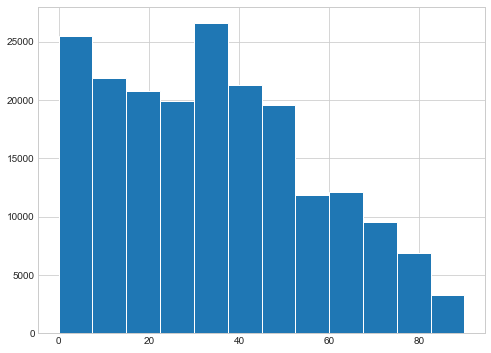

In [43]:
summarise_column(df, 'age')

### 2) Class of worker

The categorical columns are sometimes a bit harder to interpret, as the missing values or 'Not in universe' are not very descriptive.

Summary for column: class of worker
         class of worker
count             199523
unique                 9
top      Not in universe
freq              100245


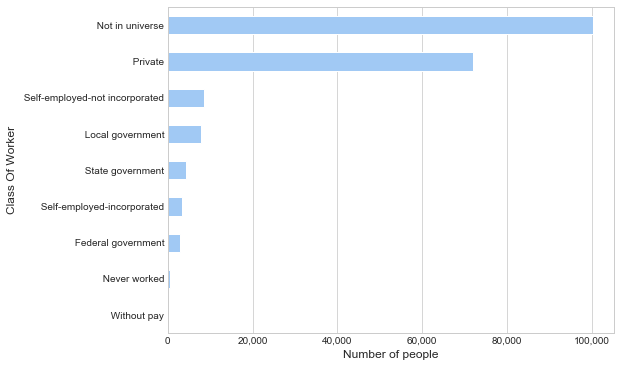

In [5]:
summarise_column(df, 'class of worker')

### 3) Detailed industry recode

In this case as well, the industry codes are not provided, just some numeric codes without a context

Summary for column: detailed industry recode
       detailed industry recode
count             199523.000000
mean                  15.352320
std                   18.067129
min                    0.000000
25%                    0.000000
50%                    0.000000
75%                   33.000000
99%                   49.000000
max                   51.000000


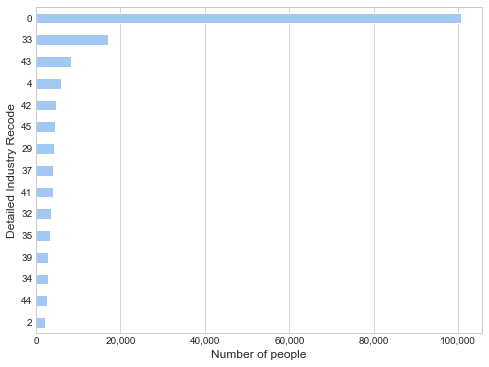

In [44]:
summarise_column(df, 'detailed industry recode')

### 4) Education

In the case of education we can observe that most of people are either high-school graduates or children (not in education)

Summary for column: education
                    education
count                  199523
unique                     17
top      High school graduate
freq                    48407


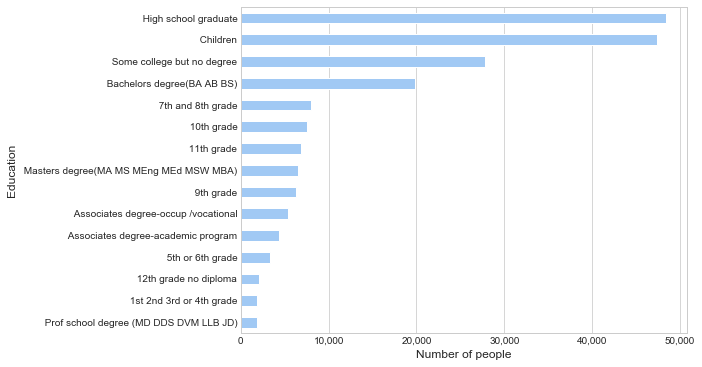

In [7]:
summarise_column(df, 'education')

### 5) Wage per hour

This should have a strong correlation with our target column (should be explored later). But it is also noticeable that since a large proportion of our population are people under 15 yo (25% of the total), they're not going to have a wage at all.

Summary for column: wage per hour
       wage per hour
count  199523.000000
mean       55.426908
std       274.896454
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
99%      1400.000000
max      9999.000000


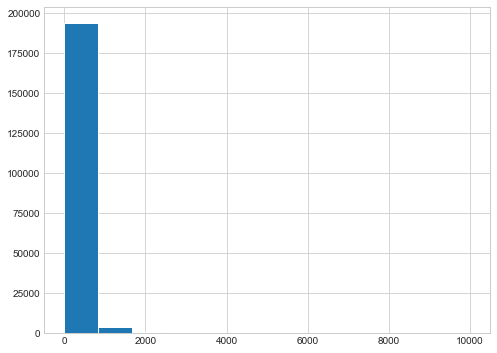

In [8]:
summarise_column(df, 'wage per hour')

### 6) Enroll in edu inst last wk

Unclear what this column might indicate. A lot fo the values are missing.

Summary for column: enroll in edu inst last wk
       enroll in edu inst last wk
count                      199523
unique                          3
top               Not in universe
freq                       186943


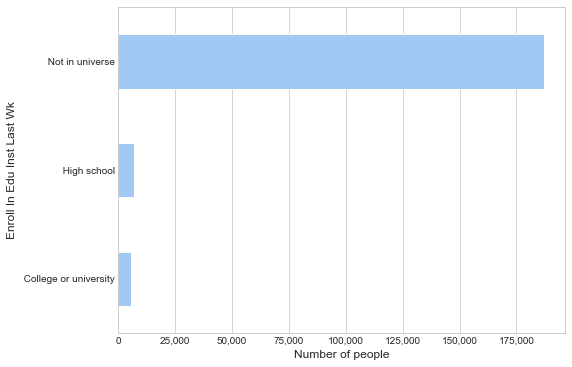

In [45]:
summarise_column(df, 'enroll in edu inst last wk')

### 7) Marital status

Here as well, children will take a big chunk of the Never married category.

Summary for column: marital stat
          marital stat
count           199523
unique               7
top      Never married
freq             86485


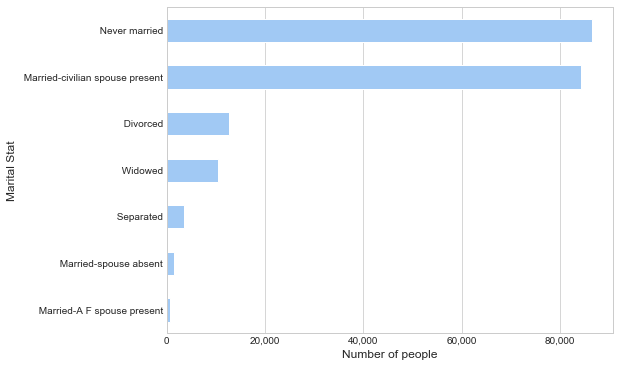

In [10]:
summarise_column(df, 'marital stat')

### 8) Major industry code

Summary for column: major industry code
                 major industry code
count                         199523
unique                            24
top      Not in universe or children
freq                          100684


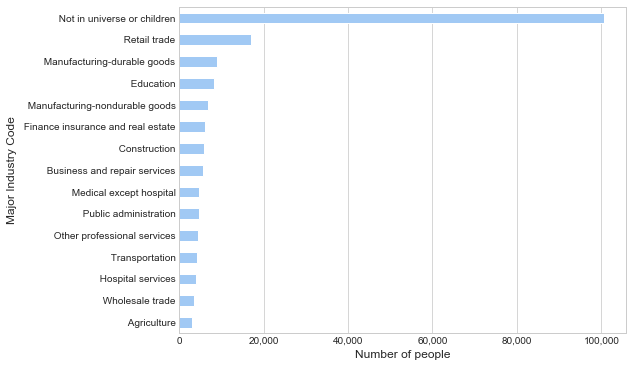

In [46]:
summarise_column(df, 'major industry code')

### 9) Major occupation code

Summary for column: major occupation code
       major occupation code
count                 199523
unique                    15
top          Not in universe
freq                  100684


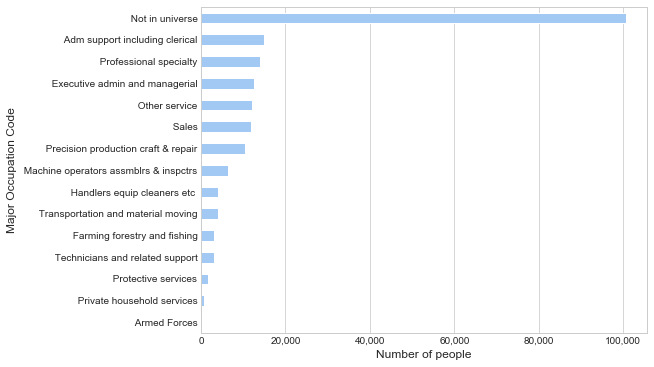

In [47]:
summarise_column(df, 'major occupation code')

### 10) Race

This attribute might as well show a strong correlation to salary. Should be explored later. It is noticeable the overwhelming White population, since according to the official census statistics, While-alone is around 60%. But here the percentage is over 83%.
Census official page - https://www.census.gov/quickfacts/fact/table/US/PST045217#qf-headnote-a

Summary for column: race
          race
count   199523
unique       5
top      White
freq    167365


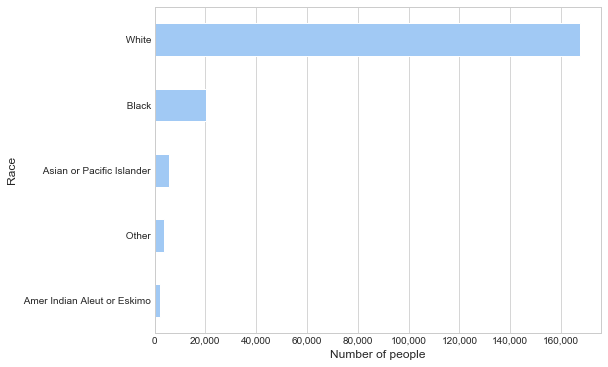

In [51]:
summarise_column(df, 'race')

### 11) Sex

Summary for column: sex
            sex
count    199523
unique        2
top      Female
freq     103984


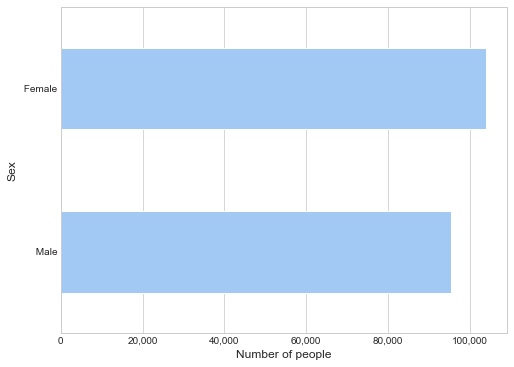

In [53]:
summarise_column(df, 'sex')

### 12) Member of a labor union

Summary for column: member of a labor union
       member of a labor union
count                   199523
unique                       3
top            Not in universe
freq                    180459


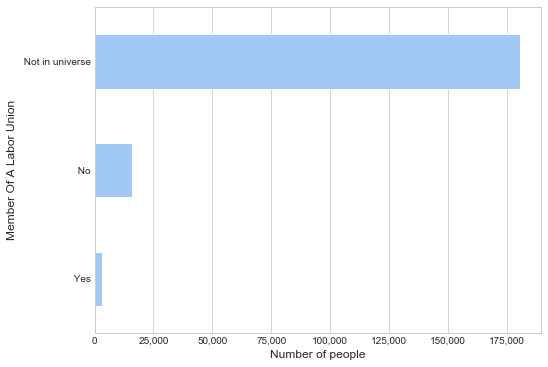

In [54]:
summarise_column(df, 'member of a labor union')

### 13) Reason for unemployment

Summary for column: reason for unemployment
       reason for unemployment
count                   199523
unique                       6
top            Not in universe
freq                    193453


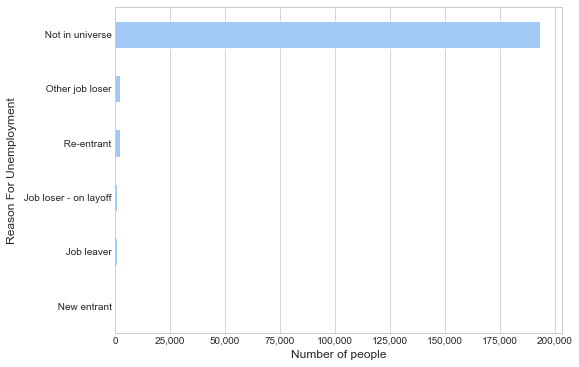

In [55]:
summarise_column(df, 'reason for unemployment')

### 14) Full or part time employment stat

This column might need to be further split, since the Children element could be split. Armed forces get a salary, but children don't.

Summary for column: full or part time employment stat
       full or part time employment stat
count                             199523
unique                                 8
top             Children or Armed Forces
freq                              123769


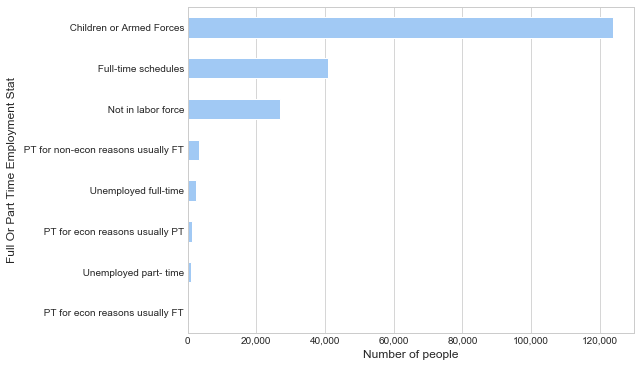

In [56]:
summarise_column(df, 'full or part time employment stat')

### 15) Capital gains

As expected, most people don't invest in the stock market or have other investments generating gains or losses. Only a small proportion of the population does, so the histogram looks quite skewed.

Summary for column: capital gains
       capital gains
count   199523.00000
mean       434.71899
std       4697.53128
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
99%       8614.00000
max      99999.00000


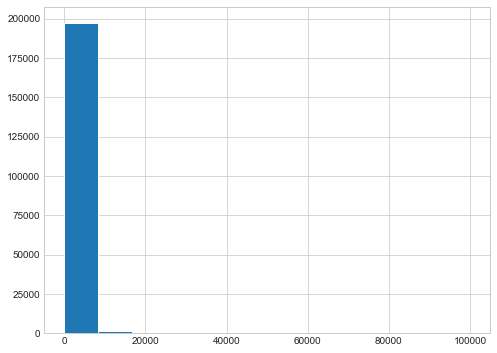

In [57]:
summarise_column(df, 'capital gains')

### 16) Capital losses

Summary for column: capital losses
       capital losses
count   199523.000000
mean        37.313788
std        271.896428
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
99%       1887.000000
max       4608.000000


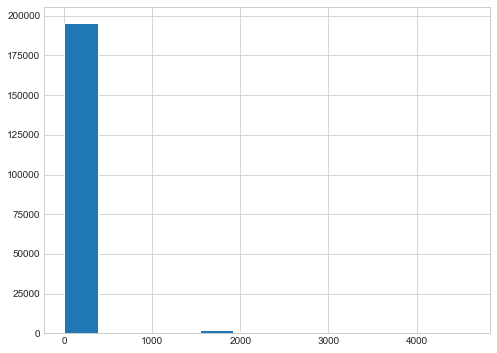

In [58]:
summarise_column(df, 'capital losses')

### 17) Dividends from stocks

Same as with capital gains.

Summary for column: dividends from stocks
       dividends from stocks
count          199523.000000
mean              197.529533
std              1984.163658
min                 0.000000
25%                 0.000000
50%                 0.000000
75%                 0.000000
99%              4550.000000
max             99999.000000


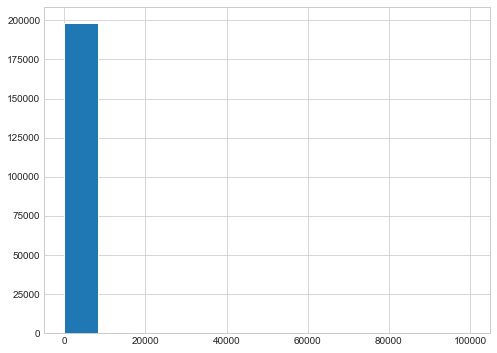

In [59]:
summarise_column(df, 'dividends from stocks')

### 18) Tax filer status

Summary for column: tax filer stat
       tax filer stat
count          199523
unique              6
top          Nonfiler
freq            75094


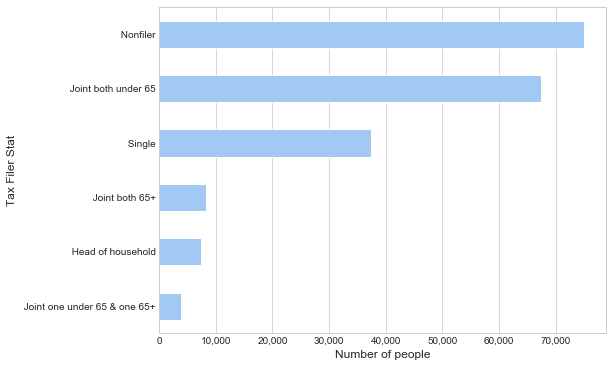

In [21]:
summarise_column(df, 'tax filer stat')

### 19) region of previous residence

A lot of missing data here. Not sure if this indicates that people have not moved at all, or a mix between collection error and non-movers

Summary for column: region of previous residence
       region of previous residence
count                        199523
unique                            6
top                 Not in universe
freq                         183750


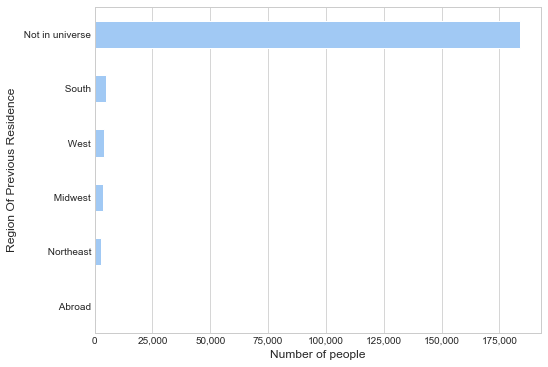

In [60]:
summarise_column(df, 'region of previous residence')

### 20) state of previous residence

Summary for column: state of previous residence
       state of previous residence
count                       199523
unique                          51
top                Not in universe
freq                        183750


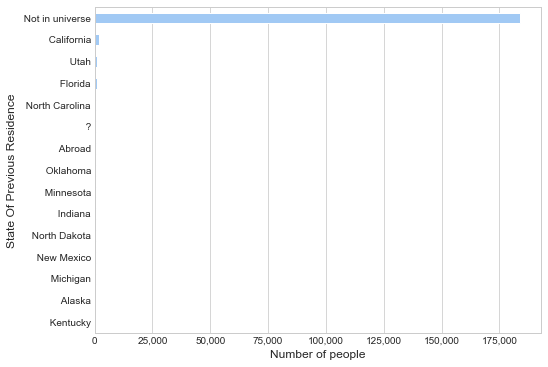

In [61]:
summarise_column(df, 'state of previous residence')

### 21) detailed household and family stat

Summary for column: detailed household and family stat
       detailed household and family stat
count                              199523
unique                                 38
top                           Householder
freq                                53248


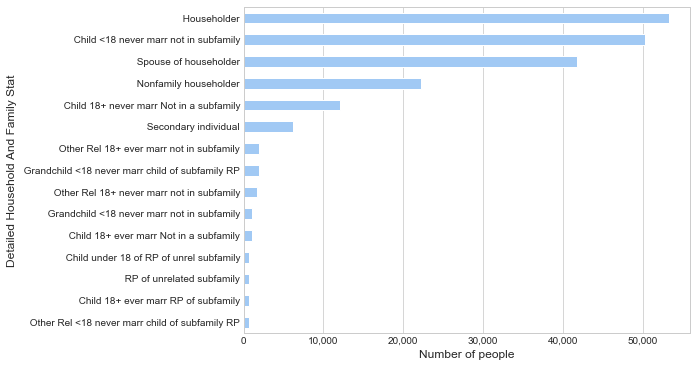

In [24]:
summarise_column(df, 'detailed household and family stat')

### 22) detailed household summary in household

Summary for column: detailed household summary in household
       detailed household summary in household
count                                   199523
unique                                       8
top                                Householder
freq                                     75475


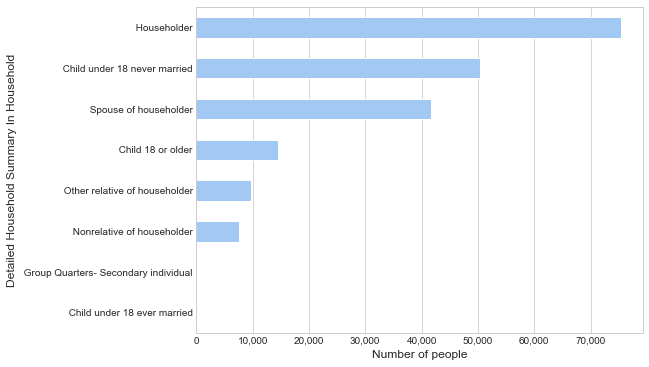

In [25]:
summarise_column(df, 'detailed household summary in household')

### 23) migration code-change in msa

Some missing values here as well, not sure MSA.

Summary for column: migration code-change in msa
       migration code-change in msa
count                        199523
unique                           10
top                               ?
freq                          99696


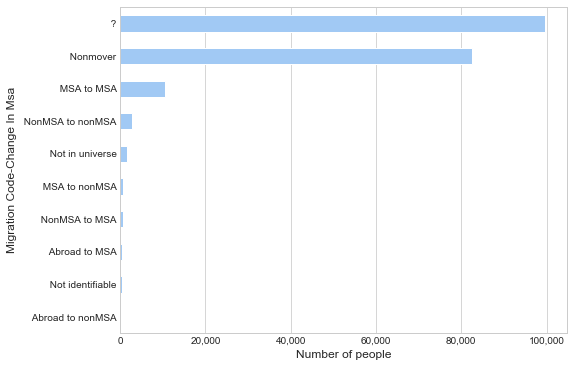

In [26]:
summarise_column(df, 'migration code-change in msa')

### 24) migration code-change in reg

Summary for column: migration code-change in reg
       migration code-change in reg
count                        199523
unique                            9
top                               ?
freq                          99696


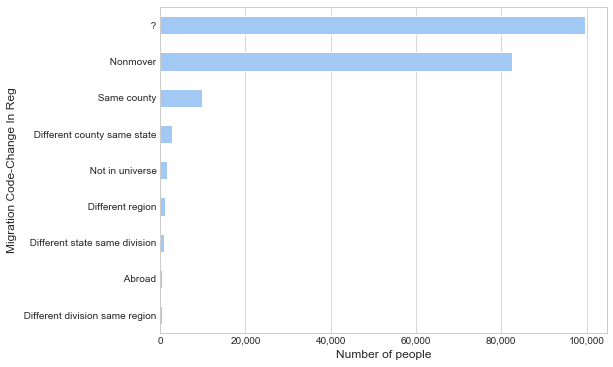

In [62]:
summarise_column(df, 'migration code-change in reg')

### 25) migration code-move within reg

Summary for column: migration code-move within reg
       migration code-move within reg
count                          199523
unique                             10
top                                 ?
freq                            99696


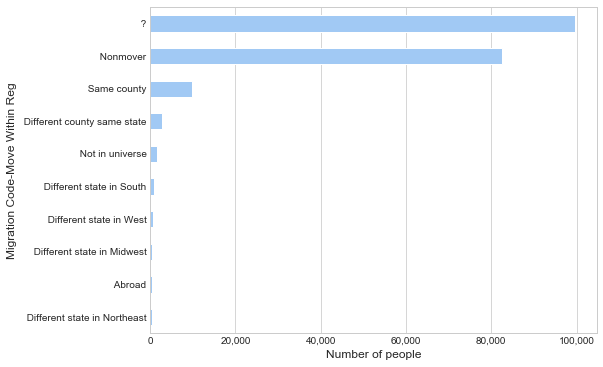

In [63]:
summarise_column(df, 'migration code-move within reg')

### 26) live in this house 1 year ago

Summary for column: live in this house 1 year ago
            live in this house 1 year ago
count                              199523
unique                                  3
top      Not in universe under 1 year old
freq                               101212


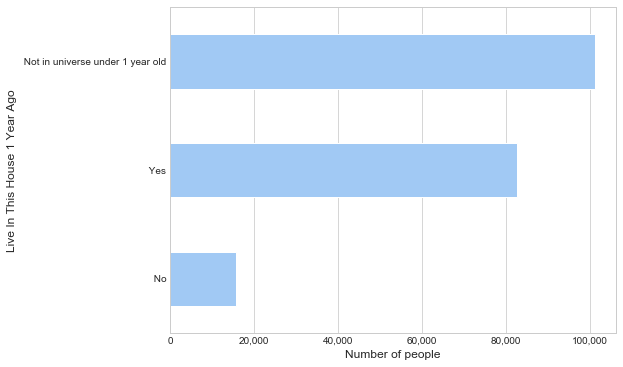

In [64]:
summarise_column(df, 'live in this house 1 year ago')

### 27) migration prev res in sunbelt

Summary for column: migration prev res in sunbelt
       migration prev res in sunbelt
count                         199523
unique                             4
top                                ?
freq                           99696


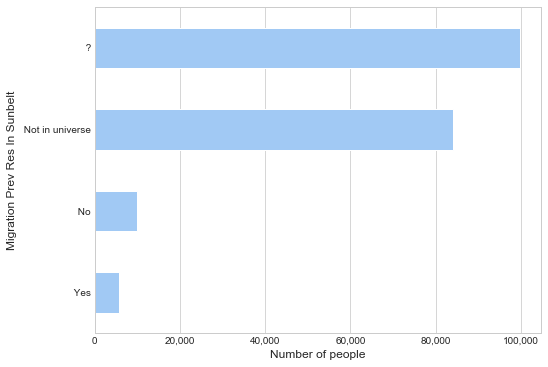

In [65]:
summarise_column(df, 'migration prev res in sunbelt')

### 28) num persons worked for employer

Summary for column: num persons worked for employer
       num persons worked for employer
count                    199523.000000
mean                          1.956180
std                           2.365126
min                           0.000000
25%                           0.000000
50%                           1.000000
75%                           4.000000
99%                           6.000000
max                           6.000000


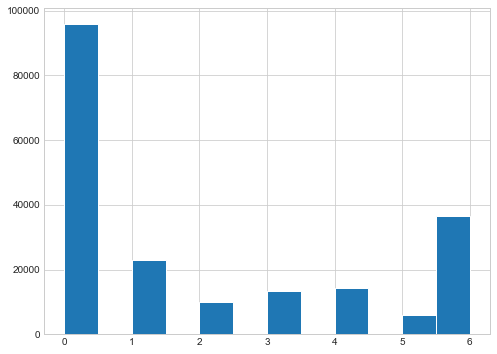

In [66]:
summarise_column(df, 'num persons worked for employer')

### 29) family members under 18

Summary for column: family members under 18
       family members under 18
count                   199523
unique                       5
top            Not in universe
freq                    144232


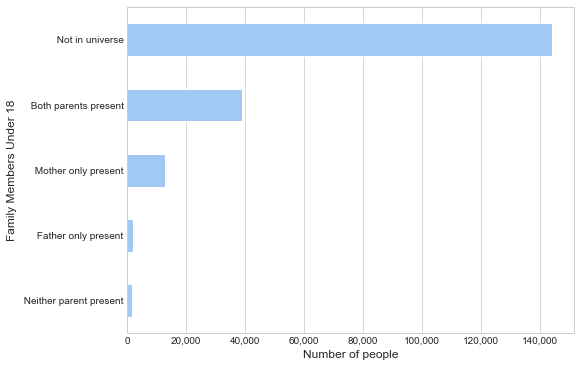

In [67]:
summarise_column(df, 'family members under 18')

### 30) country of birth father

Summary for column: country of birth father
       country of birth father
count                   199523
unique                      43
top              United-States
freq                    159163


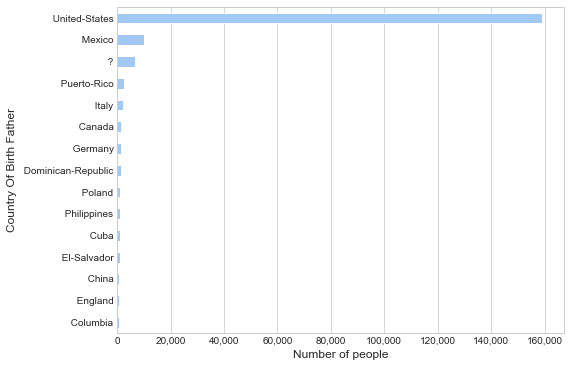

In [68]:
summarise_column(df, 'country of birth father')

### 31) country of birth mother

Summary for column: country of birth mother
       country of birth mother
count                   199523
unique                      43
top              United-States
freq                    160479


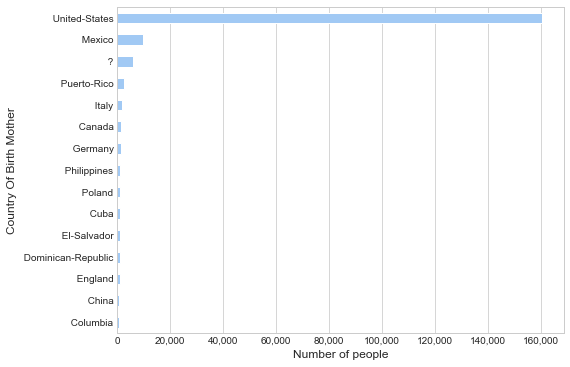

In [69]:
summarise_column(df, 'country of birth mother')

### 32) country of birth self

Summary for column: country of birth self
       country of birth self
count                 199523
unique                    43
top            United-States
freq                  176989


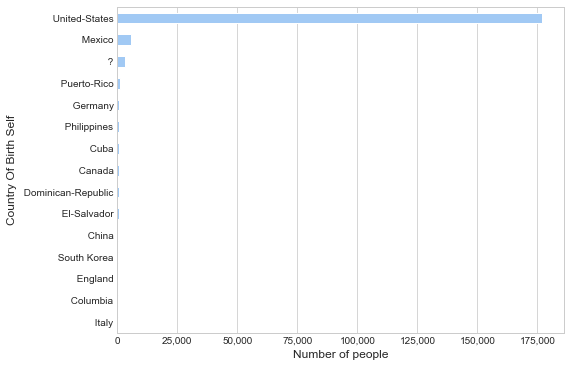

In [70]:
summarise_column(df, 'country of birth self')

### 33) citizenship

Summary for column: citizenship
                               citizenship
count                               199523
unique                                   5
top      Native- Born in the United States
freq                                176992


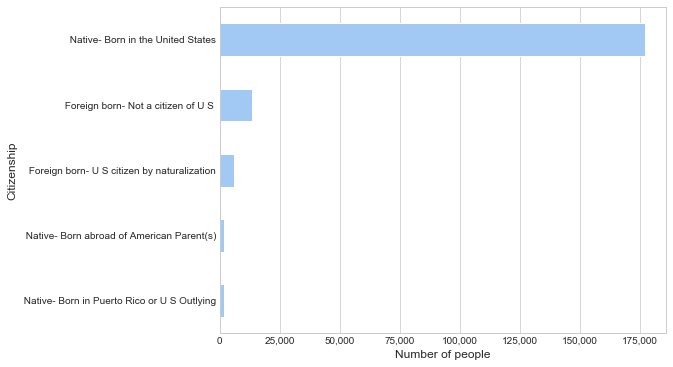

In [71]:
summarise_column(df, 'citizenship')

### 34) own business or self employed

Summary for column: own business or self employed
       own business or self employed
count                  199523.000000
mean                        0.175438
std                         0.553694
min                         0.000000
25%                         0.000000
50%                         0.000000
75%                         0.000000
99%                         2.000000
max                         2.000000


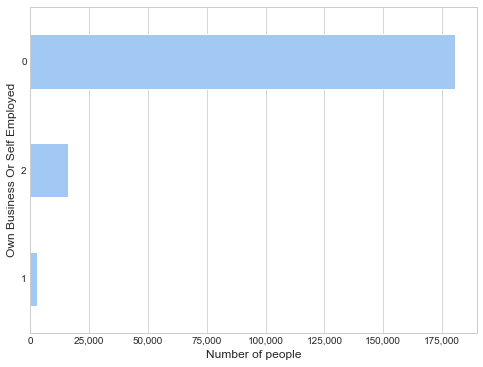

In [72]:
summarise_column(df, 'own business or self employed')

### 35) fill inc questionnaire for veteran's admin

Summary for column: fill inc questionnaire for veteran's admin
       fill inc questionnaire for veteran's admin
count                                      199523
unique                                          3
top                               Not in universe
freq                                       197539


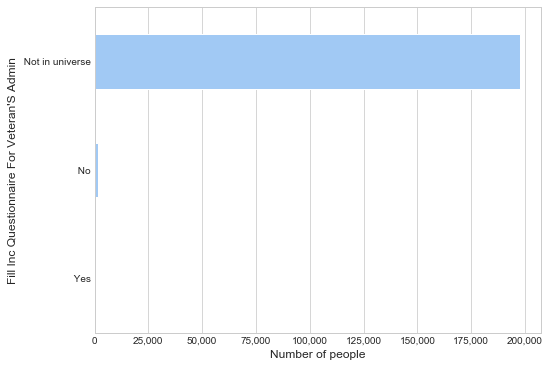

In [73]:
summarise_column(df, "fill inc questionnaire for veteran's admin")

### 36) veterans benefits

Summary for column: veterans benefits
       veterans benefits
count      199523.000000
mean            1.514833
std             0.851473
min             0.000000
25%             2.000000
50%             2.000000
75%             2.000000
99%             2.000000
max             2.000000


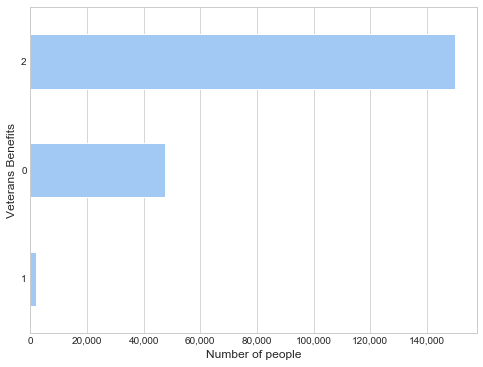

In [74]:
summarise_column(df, 'veterans benefits')

### 37) weeks worked in year

Summary for column: weeks worked in year
       weeks worked in year
count         199523.000000
mean              23.174897
std               24.411488
min                0.000000
25%                0.000000
50%                8.000000
75%               52.000000
99%               52.000000
max               52.000000


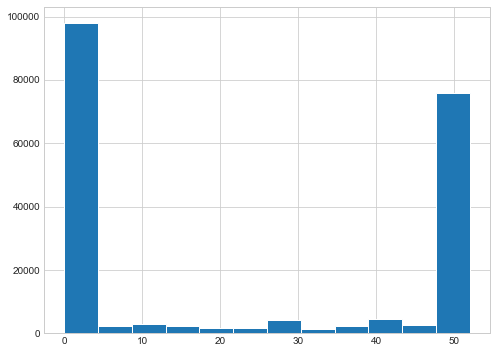

In [75]:
summarise_column(df, 'weeks worked in year')

### 38) year

Summary for column: year
                year
count  199523.000000
mean       94.499672
std         0.500001
min        94.000000
25%        94.000000
50%        94.000000
75%        95.000000
99%        95.000000
max        95.000000


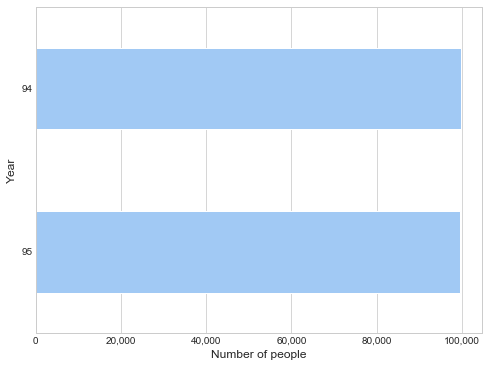

In [76]:
summarise_column(df, 'year')